In [1]:
import nltk


In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
from nltk.tokenize import word_tokenize

In [3]:
text=open('read.txt',encoding='utf-8').read()
text

'Title: "Embracing the Power of Positivity: A Path to a Happier and Healthier Life"\n\nIn a world often filled with challenges and uncertainties, it\'s crucial to remember the incredible impact of positivity on our lives. A positive outlook not only improves our mental and emotional well-being but also has profound effects on our physical health and overall quality of life. Let\'s delve into the many benefits of embracing positivity and how you can cultivate it in your own life.\n\nImproved Mental Health: Positivity is like a shield against stress, anxiety, and depression. When you focus on positive thoughts and experiences, it can help reduce the symptoms of these mental health conditions. It\'s like a ray of sunshine breaking through the clouds on a gloomy day.\n\nEnhanced Resilience: Positivity equips you with the tools to bounce back from setbacks and challenges. Instead of dwelling on failures, you learn from them and move forward with a renewed sense of determination and optimism

In [4]:
from textblob import TextBlob

In [5]:
corrected_text=TextBlob(text)
corrected_text=corrected_text.correct()

In [6]:
lower_case=text.lower()

In [7]:
import string

In [8]:
cleaned_text=lower_case.translate(str.maketrans("","",string.punctuation))

In [9]:
tokenized_words=word_tokenize(cleaned_text)

In [10]:
from nltk.corpus import stopwords

In [11]:
final_words=[]
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [12]:
from nltk.probability import FreqDist

In [13]:
frequency_dist=FreqDist(final_words)

In [14]:
frequency_dist

FreqDist({'positivity': 12, 'life': 9, 'positive': 7, 'health': 4, 'happier': 3, 'healthier': 3, 'challenges': 3, 'mental': 3, 'physical': 3, 'reduce': 3, ...})

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
wccloud=WordCloud().generate_from_frequencies(frequency_dist)

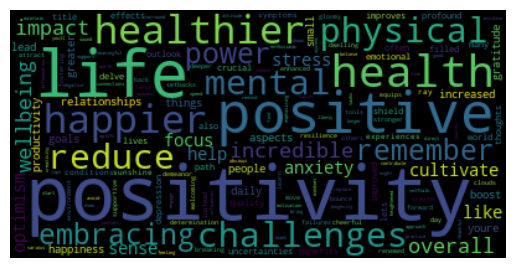

In [17]:
plt.imshow(wccloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
from nltk.stem import PorterStemmer
st=PorterStemmer()

In [19]:
stemmed_word=[]
for word in final_words:
    stemmed_word.append(st.stem(word))

In [20]:
from textblob import Word

In [21]:
#lemmatized_word=[]
#for word in stemmed_word:
    #lemmatized_word.append(Word(word).lemmatize())

In [22]:
final_words

['title',
 'embracing',
 'power',
 'positivity',
 'path',
 'happier',
 'healthier',
 'life',
 'world',
 'often',
 'filled',
 'challenges',
 'uncertainties',
 'crucial',
 'remember',
 'incredible',
 'impact',
 'positivity',
 'lives',
 'positive',
 'outlook',
 'improves',
 'mental',
 'emotional',
 'wellbeing',
 'also',
 'profound',
 'effects',
 'physical',
 'health',
 'overall',
 'quality',
 'life',
 'lets',
 'delve',
 'many',
 'benefits',
 'embracing',
 'positivity',
 'cultivate',
 'life',
 'improved',
 'mental',
 'health',
 'positivity',
 'like',
 'shield',
 'stress',
 'anxiety',
 'depression',
 'focus',
 'positive',
 'thoughts',
 'experiences',
 'help',
 'reduce',
 'symptoms',
 'mental',
 'health',
 'conditions',
 'like',
 'ray',
 'sunshine',
 'breaking',
 'clouds',
 'gloomy',
 'day',
 'enhanced',
 'resilience',
 'positivity',
 'equips',
 'tools',
 'bounce',
 'back',
 'setbacks',
 'challenges',
 'instead',
 'dwelling',
 'failures',
 'learn',
 'move',
 'forward',
 'renewed',
 'sense',


In [23]:
from textblob import TextBlob

In [24]:
def calculate_polarity_subjectivity_plot(text):
    blob=TextBlob(text)
    polarity=blob.sentiment.polarity
    subjectivity=blob.sentiment.polarity
    print("Polarity:",polarity)
    print("Subjectivity:",subjectivity)
    categories=['Polarity','Subjectivity']
    Scores=[polarity,subjectivity]
    plt.figure(figsize=(5,4))
    fig,ax1=plt.subplots()
    ax1.bar(categories,Scores)
    fig.autofmt_xdate()
    plt.xlabel('Score')
    plt.title('Polarity and Subjectivity')
    plt.ylim(-1,1)

Polarity: 0.20898802843247283
Subjectivity: 0.20898802843247283


<Figure size 500x400 with 0 Axes>

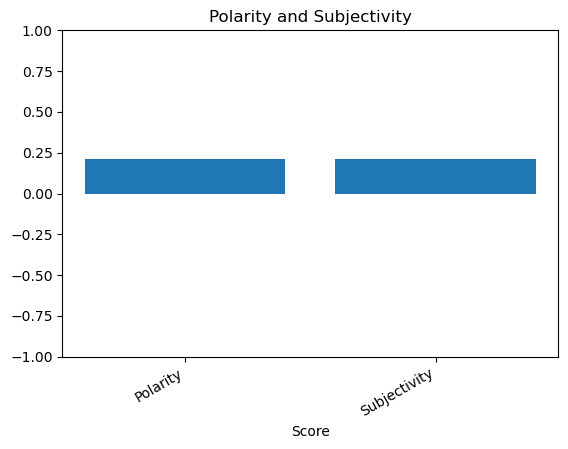

In [25]:
calculate_polarity_subjectivity_plot(cleaned_text)

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
def sentiment_analyzer_plot(text):
    analyzer=SentimentIntensityAnalyzer()
    scores=analyzer.polarity_scores(text)
    pos=scores['pos']
    neg=scores['neg']
    neu=scores['neu']
    compound=scores['compound']
    print('pos:{},neg:{},neu:{},compound:{}'.format(pos,neg,neu,compound))
    if compound>0.05:
        print("The text is positive")
    elif compound<-0.05:
        print("The text is negative")
    else:
        print("The text is neutral")
    Categories=['Pos','Neg','Neu','Compound']
    Scores=[pos,neg,neu,compound]
    plt.figure(figsize=(5,4))
    fig,ax1=plt.subplots()
    ax1.bar(Categories,Scores)
    fig.autofmt_xdate()
    plt.xlabel('Score')
    plt.title('Sentiment Score Breakdown')
    plt.ylim(-1,1)

pos:0.4,neg:0.065,neu:0.535,compound:0.9997
The text is positive


<Figure size 500x400 with 0 Axes>

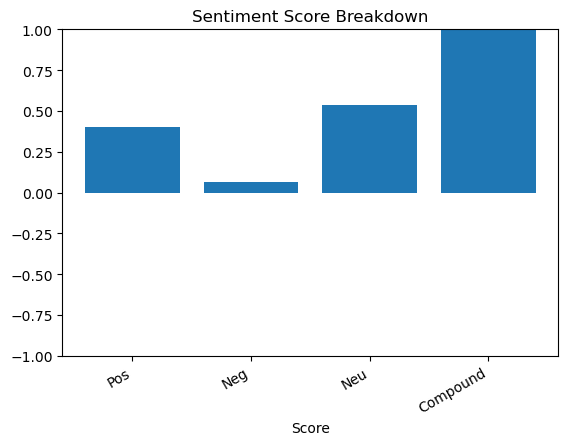

In [28]:
sentiment_analyzer_plot(cleaned_text)

In [29]:
from nrclex import NRCLex

In [30]:
emotion_categories={
    'anger':0,
    'anticipation':0,
    'disgust':0,
    'fear':0,
    'joy':0,
    'negative':0,
    'positive':0,
    'sadness':0,
    'surprise':0,
    'trust':0
}
category_mapping={
    'anger':'anger',
    'anticip':'anticipation',
    'disgust':'disgust',
    'fear':'fear',
    'joy':'joy',
    'negative':'negative',
    'positive':'positive',
    'sadness':'sadness',
    'surprise':'surprise',
    'trust':'trust'
}

In [31]:
def emotion_analysis(final_words):
    for word in final_words:
        emotion=NRCLex(word)
        top_emotions=emotion.top_emotions
        if top_emotions:
            for emo in top_emotions:
                emotion_category=emo[0]
                emotion_score=emo[1]
                mapped_category=category_mapping.get(emotion_category, emotion_category)
                emotion_categories[mapped_category] += emotion_score
    print(emotion_categories)                

In [32]:
emotion_analysis(final_words)

{'anger': 0.6000000000000001, 'anticipation': 8.649999999999999, 'disgust': 0.2, 'fear': 2.0999999999999996, 'joy': 6.666666666666667, 'negative': 8.266666666666666, 'positive': 30.66666666666666, 'sadness': 2.6, 'surprise': 1.7500000000000002, 'trust': 6.499999999999999}


In [33]:
def plot_emotions(emotion_categories):
    emotion_labels=list(emotion_categories.keys())
    emotion_scores=list(emotion_categories.values())
    plt.figure(figsize=(10, 6))
    plt.bar(emotion_labels, emotion_scores, color='skyblue')
    plt.xlabel('Emotion Categories')
    plt.ylabel('Emotion Scores')
    plt.title('Emotion Analysis for Text')
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

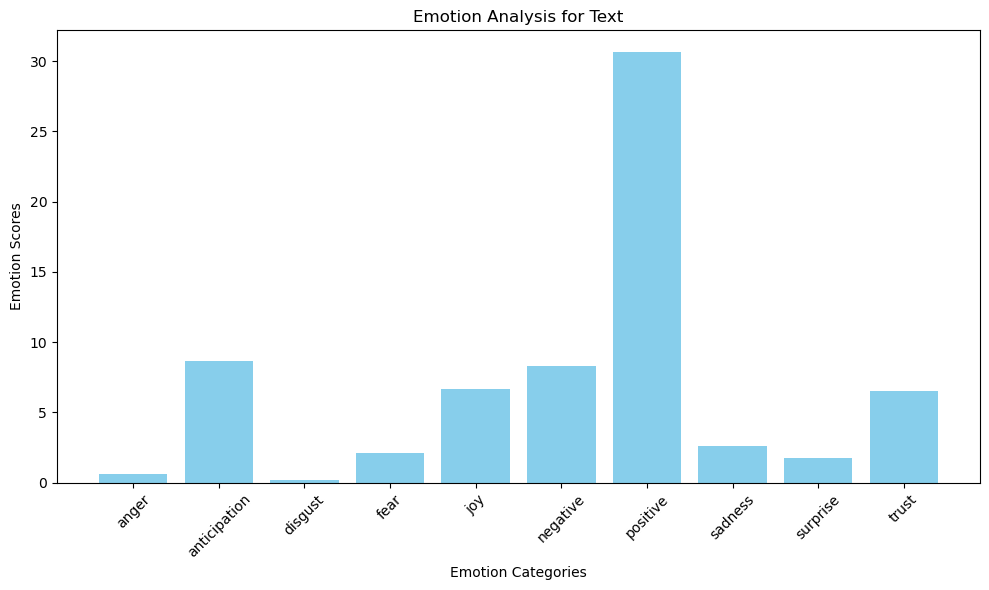

In [34]:
plot_emotions(emotion_categories)

In [35]:
def key_sentiment_words(text):
    sia = SentimentIntensityAnalyzer()
    blob = TextBlob(text)
    threshold = 0.2
    positive_tokens = []
    negative_tokens = []
    for sentence in blob.sentences:
        for word in sentence.words:
            sentiment_score = sia.polarity_scores(word)
            if sentiment_score['compound'] > threshold:
                positive_tokens.append((word, sentiment_score['compound']))
            elif sentiment_score['compound'] < -threshold:
                negative_tokens.append((word, sentiment_score['compound']))
    sorted_positive_tokens = sorted(positive_tokens, key=lambda x: x[1], reverse=True)
    sorted_negative_tokens = sorted(negative_tokens, key=lambda x: x[1])
    print("Positive Tokens:")
    for token, score in sorted_positive_tokens:
        print(f"{token}: {score}")
    print("\nNegative Tokens:")
    for token, score in sorted_negative_tokens:
        print(f"{token}: {score}")


In [36]:
key_sentiment_words(cleaned_text)

Positive Tokens:
success: 0.5719
thankful: 0.5719
celebrating: 0.5719
positive: 0.5574
positive: 0.5574
positive: 0.5574
positive: 0.5574
positive: 0.5574
happiness: 0.5574
happiness: 0.5574
positive: 0.5574
successes: 0.5574
positive: 0.5574
optimism: 0.5423
optimism: 0.5423
cheerful: 0.5423
happier: 0.5267
happier: 0.5267
happier: 0.5267
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
gratitude: 0.5106
gratitude: 0.5106
positivity: 0.5106
confidence: 0.5106
positivity: 0.5106
positivity: 0.5106
positivity: 0.5106
sunshine: 0.4939
improved: 0.4767
kindness: 0.4588
welcoming: 0.4404
enthusiasm: 0.4404
good: 0.4404
improves: 0.4215
help: 0.4019
determination: 0.4019
boost: 0.4019
support: 0.4019
treat: 0.4019
boost: 0.4019
help: 0.4019
benefits: 0.3818
stronger: 0.3818
creativity: 0.3818
like: 0.3612
like: 0.3612
attract: 0.3612
greater: 0.3612
greater: 0.3612
motivation: 0.34
engage: